# 1. Title: Construction of an inference model for a multiple linear regression
Members:
- Mark Cao 
- Aarush Agarwal
- Edward Kim
- Ibrahim Saeed
  
Course: STAT301 102

April 16th, 2025


# Library

In [2]:
# Main Developer: Mark

library(tidyverse)
library(repr)
library(broom)
library(leaps)
library(moderndive)
library(MASS)
library(car)
library(rsample)
library(ggplot2)

print("LIBRARIES LOADED")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




[1] "LIBRARIES LOADED"


# 2. Introduction

Sleep plays a crucial role in maintaining physical and mental health. Disruptions in sleep quality or duration have been consistently associated with increased stress levels, cardiovascular risk, and metabolic issues such as obesity. As lifestyles become more demanding and sedentary, understanding how daily habits impact sleep health is both timely and essential. For this project, we use the Sleep Health and Lifestyle Dataset which contains 374 observations and 13 variables, covering sleep quality, daily activity, stress, and cardiovascular health. It includes numerical and categorical data, such as sleep duration (hours), self-reported sleep quality (1-10 scale), physical activity level (minutes/day), stress level (1-10 scale), BMI category, and presence of sleep disorders (None, Insomnia, Sleep Apnea). This dataset helps analyze the relationship between lifestyle choices and sleep health. 

Our inference-based research question is as follows:
We wish to examine the association between a person's sleep duration and health-routine-related predictors such as BMI, physical activity level, sleep disorder, stress level, etc.
Our question is primarily focused on inference, as our goal is to examine association intead of predicting values. By examining the model’s coefficients, we can interpret how each factor contributes to changes in sleep duration, providing insights into potential lifestyle adjustments for better sleep health.

There’s already quite a bit of research highlighting how lifestyle choices are connected to sleep health. For example, Grandner (2017) points out that behaviors like physical activity and diet play an important role in sleep quality. Medic et al. (2017) explain how poor sleep can affect both mental and physical health, especially through stress and cardiovascular issues. Similarly, Khan and Aouad (2017) show links between sleep loss and cardiovascular risk factors like high BMI and blood pressure. These studies help back up the relevance of the variables we’re exploring and show why it makes sense to look for associations between them and sleep disorders in this project.

# 3. Methods and Results

### a) Data 

In [1]:
<<<<<<< LOCAL CELL DELETED >>>>>>>
# Import required libraries
library(tidyverse)
library(repr)
library(broom)
library(leaps)
library(moderndive)
library(MASS)
library(car)
library(rsample)
library(ggplot2)

print("LIBRARIES LOADED")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




[1] "LIBRARIES LOADED"


In [4]:
# Main Developer: Mark

file_url <- "https://drive.google.com/uc?export=download&id=1ZjZvLl5dUzHEF8ouimlTg8t0MorhjzVA"
sleep_data <- read.csv(file_url)
head(sleep_data)
set.seed(114514) # SEED, DO NOT CHANGE

,Person.ID,Gender,Age,Occupation,Sleep.Duration,Quality.of.Sleep,Physical.Activity.Level,Stress.Level,BMI.Category,Blood.Pressure,Heart.Rate,Daily.Steps,Sleep.Disorder
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


Dataset used: Laksika Tharmalingam. 2024. Sleep Health and Lifestyle Dataset. Retrieved from https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

A detailed description of all the variables in the dataset is as follows:-

| Variable | Type of Variable | Description |
| -------- | --------------- | ----------- |
| Person ID | Numeric | Unique identifier for each individual |
| Gender | Categorical | Gender of the individual (Male/Female) |
| Age | Numeric | Age of the individual in years |
| Occupation | Categorical | Job or profession of the individual |
| Sleep Duration | Numeric | Number of hours a person sleep per day |
| Quality of Sleep | Numeric | Subjective sleep quality rating (1-10) |
| Physical Activity Level | Numeric | Minutes of physical activity of an individual per day |
| Stress Level | Numeric | Subjective stress level of a person (1-10) |
| BMI Category | Categorical | BMI classification (Underweight, Normal, Overweight) |
| Blood Pressure  | Numeric | The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| Heart Rate | Numeric | Resting heart rate in beats per minute |
| Daily Steps | Numeric | Number of steps taken per day |
| Sleep Disorder | Categorical | Presence of a sleep disorder (None, Insomnia, Sleep Apnea) |

#### The source of the dataset states that the set is synthetic and was generated for illustrative purposes.

### b) Exploratory Data Analysis (EDA)

#### Tidying and pre-selection

Tidying the data for modelling:
-  We remove the PersonID column, as it provides no statistical information.
-  For readability, we replace all column names, categorical level names, and other string data with versions without periods or whitespace in between characters.
-  For readability we replace these column names: "QualityofSleep" -> "SleepQuality", and "PysicalActivityLevel" -> "PhysicalActivity".
-  We perform factor conversion to all categorical variables.
- We replace the "BloodPressure" column with two new columns "SystolicPressure" and "DiastolicPressure" to maintain proper numerical columns for modelling.
- For simplicity we replace all "Obese" entries in BMICategory with "Overweight" so that only two levels remain: "Normal" and "Overweight"
- For simplicity we replace all SleepDisorder entries with either "None" for no sleep disorder and "Present" for any kind of sleep disorder.
- For future interpretability we replace the DailySteps column with Daily1000Steps for the number of daily steps of an individual divided by 1000.
- For future interpretability we divide all entries in PhysicalActivity by 60 to represent daily physical activity level of an individual in hours instead of minutes.
  
We set the reference level for each categorical variable as the following:
- BMICategory: "Normal"
- SleepDisorder: "None"
- Gender: "Male"
- Occupation: "Accountant"

In terms of pre-selection, the only complete removal was the PersonID column.


In [9]:
sleep_data_reduced <- sleep_data |>
dplyr::select(-`Person.ID`) %>%
{ names(.) <- names(.) |> str_replace_all("[\\.\\s]", "")
.} %>%
mutate(Occupation = str_replace_all(Occupation, "[\\.\\s]", "")) |>
mutate(PhysicalActivityLevel = PhysicalActivityLevel / 60) |>
separate(BloodPressure, into = c("SystolicPressure", "DiastolicPressure"), sep = "/") |>
mutate(across(c(SystolicPressure, DiastolicPressure), as.numeric)) |>
mutate(BMICategory = if_else(str_detect(BMICategory, "Obese"), "Overweight", BMICategory)) |>
mutate(SleepDisorder = if_else(SleepDisorder == "None", "None", "Present")) |>
mutate(Daily1000Steps = DailySteps / 1000) |>
dplyr::select(-DailySteps) |>
rename(SleepQuality = QualityofSleep, PhysicalActivity = PhysicalActivityLevel) |>
mutate(
    BMICategory = fct_relevel(BMICategory, "Normal"),
    SleepDisorder = fct_relevel(SleepDisorder, "None"),
    Gender = fct_relevel(Gender, "Male"),
    Occupation = fct_relevel(Occupation, "Accountant")
  ) |>
mutate(across(where(is.character), as_factor))

head(sleep_data_reduced) 
nrow(sleep_data_reduced)

,Gender,Age,Occupation,SleepDuration,SleepQuality,PhysicalActivity,StressLevel,BMICategory,SystolicPressure,DiastolicPressure,HeartRate,SleepDisorder,Daily1000Steps
,<fct>,<int>,<fct>,<dbl>,<int>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>
1,Male,27,SoftwareEngineer,6.1,6,0.7,6,Overweight,126,83,77,None,4.2
2,Male,28,Doctor,6.2,6,1.0,8,Normal,125,80,75,None,10.0
3,Male,28,Doctor,6.2,6,1.0,8,Normal,125,80,75,None,10.0
4,Male,28,SalesRepresentative,5.9,4,0.5,8,Overweight,140,90,85,Present,3.0
5,Male,28,SalesRepresentative,5.9,4,0.5,8,Overweight,140,90,85,Present,3.0
6,Male,28,SoftwareEngineer,5.9,4,0.5,8,Overweight,140,90,85,Present,3.0


[1] 374

We note again that the new tidy and pre-selected dataset contains:

- "SleepQuality" name change from "QualityofSleep"
- "PhysicalActivity" as HOURS of physical activity per day instead of minutes
- "BMICategory" as either normal or overweight
- "SystolicPressure" from the systolic part of the blood pressure column
- "DiastolicPressure" from the diastolic part of the blood pressure column
- "SleepDisorder" as either None or Present
- "Daily1000Steps" for steps per day divided by 1000

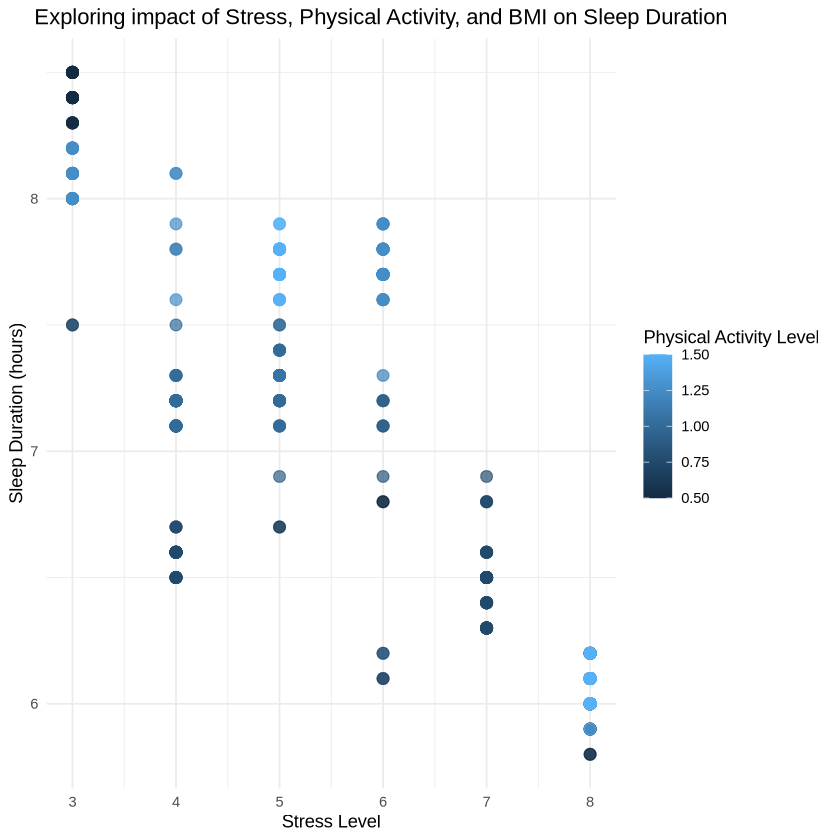

In [19]:
# Main Developer: Aarush

plot <- ggplot(sleep_data_reduced, aes(x = StressLevel, y = SleepDuration, color = PhysicalActivity)) +
  geom_point(size = 3, alpha = 0.7) +                                                 
  labs(title = "Exploring impact of Stress, Physical Activity, and BMI on Sleep Duration",
       x = "Stress Level",
       y = "Sleep Duration (hours)",
       color = "Physical Activity Level") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.1))

plot

From this scatterplot, we can see higher stress levels are associated with shorter sleep duration. People with more physical activity tend to sleep longer, suggesting that physical activity may help buffer the negative effects of stress on sleep.

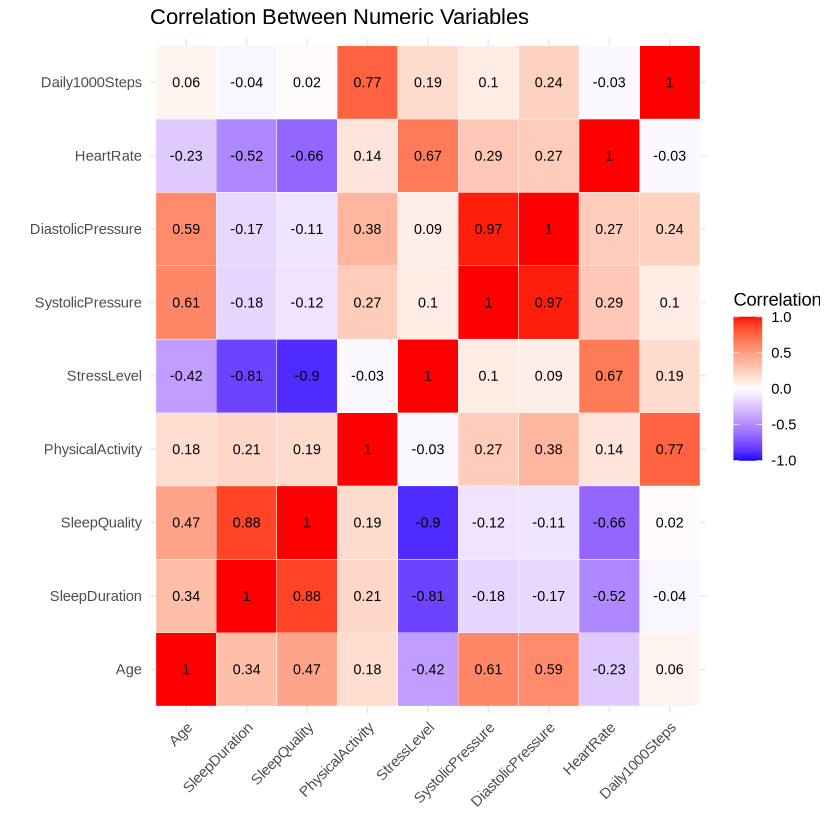

In [23]:
# Main Developer: Aarush

num_vars <- sleep_data_reduced |>
  dplyr::select(where(is.numeric))
cor_matrix <- round(cor(num_vars, use = "complete.obs"), 2)

melted_cor <- melt(cor_matrix)
ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", 
                       midpoint = 0, limit = c(-1, 1), name = "Correlation") +
  geom_text(aes(label = value), color = "black", size = 3) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  labs(title = "Correlation Between Numeric Variables",
       x = "", y = "")

In this heatmap, we can see the pairwise correlations between numeric variables. We observe strong negative correlations between Sleep Duration, Sleep Quality, and Stress Level, indicating that higher stress is associated with poorer sleep outcomes. A very strong positive correlation is seen between Systolic and Diastolic Pressure, suggesting potential multicollinearity if both are used in modeling. This visualization helps identify variable relationships and warns of redundant predictors.

In [25]:
sum(is.na(sleep_data_reduced))

[1] 0

We can see that there are no NAs in the dataset

In [28]:
# Main Developer: Aarush

sleep_data_reduced %>%
  count(BMICategory, SleepDisorder, Gender) %>%
  arrange(desc(n))

BMICategory,SleepDisorder,Gender,n
<fct>,<fct>,<fct>,<int>
Normal,None,Male,122
Overweight,Present,Female,96
Normal,None,Female,61
Overweight,Present,Male,43
Overweight,None,Female,11
Normal Weight,None,Female,10
Normal,Present,Male,9
Overweight,None,Male,8
Normal Weight,None,Male,7


This table shows how participants are grouped by BMI, sleep disorder status, and gender. It helps us check data balance and spot issues like rare categories (e.g., "Normal Weight"), which may need fixing before modeling.

### c) Methods: Plan

INFERENCE QUESTION: TO SEE IF THERE IS AN ASSOCIATION BETWEEN RESPONSE VARIABLE SLEEP DURATION AND OTHER HEALTH AND ROUTINE FACTORS SUCH AS PHYSICAL ACTIVITY, OCCUPATION, AGE, STRESS LEVEL.

## Explain chosen method and justification here ***

### Assumptions:
- Linear relationship between Sleep duration(response) and the person's physical and mental health(input)
- Errors are independent
- Conditional distribution of the error term is normal
- Variances of the error term are equal
- Furthermore, I will use variable selection methods to minimize the effect of multicollinearity.
### Potential drawbacks and limitations:
- Even though sleep duration is a continuous variable, the relationship might not be perfectly linear
- Potential issues with our variable selection step.

### Data splitting

We first split the data 50%/50% for selection/inference:

In [4]:
# SPLITTING
data_split <- sleep_data_reduced |> initial_split(prop = 0.5, strata = SleepDuration)
sleep_selection <- training(data_split)
sleep_inference <- testing(data_split)
print(paste("Selection N-ROWS:", nrow(sleep_selection)))
print(paste("Inference N-ROWS:", nrow(sleep_inference)))

[1] "Selection N-ROWS: 187"
[1] "Inference N-ROWS: 187"


### Initial VIF check
First we do a quick VIF check on the full model using the selection set:

In [5]:
# FIRST VIF CHECK WITH FULL DATA
sleep_full <- lm(SleepDuration~., data=sleep_data_reduced)
vif(sleep_full)

,GVIF,Df,GVIF^(1/(2*Df))
Gender,17.252348,1,4.153595
Age,40.231107,1,6.342800
Occupation,5651.340832,9,1.616043
SleepQuality,49.476411,1,7.033947
PhysicalActivity,7.060985,1,2.657251
StressLevel,29.481469,1,5.429684
BMICategory,25.472042,1,5.046983
SystolicPressure,170.903709,1,13.073015
DiastolicPressure,175.005118,1,13.228950
HeartRate,5.725148,1,2.392728


### Variables with high scaled-GVIF:

SleepQuality, SystolicPressure, DiastolicPressure.

### VIF-based selection

Here we choose to manually remove the "DiastolicPressure" column from the model:

- Due to multicollinearity with SystolicPressure
- To simply the model and increase performance while keeping a similar representation to having both blood pressure values

In [6]:
# MANUALLY REMOVE PROBLEMATIC DIASTOLIC PRESSURE COLUMN
sleep_step_ready <- sleep_data_reduced |>
  dplyr::select(-DiastolicPressure)

In [6]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
# Main Developer: Edward
# SPLITTING
data_split <- sleep_step_ready |> initial_split(prop = 0.7, strata = SleepDuration)
sleep_train <- training(data_split)
sleep_test <- testing(data_split)
print(paste("TRAINING N-ROWS:", nrow(sleep_train)))
print(paste("TESTING N-ROWS:", nrow(sleep_test)))

[1] "TRAINING N-ROWS: 260"
[1] "TESTING N-ROWS: 114"


# Model selection

### Explain variable selection method here ***

Here we refit the full model and then use the selection set to perform model selection with stepAIC:

In [7]:
# RE-FIT FULL MODEL WITH TRAINING SET WITH PROBLEMATIC COLUMN REMOVED
sleep_full <- lm(SleepDuration~., data=sleep_train)
# STEP AIC WITH FULL MODEL FROM TRAINING SET
aic_model <- stepAIC(sleep_full, direction = "backward", k = log(nrow(sleep_train)))

Start:  AIC=-471.91
SleepDuration ~ Gender + Age + Occupation + SleepQuality + PhysicalActivity + 
    StressLevel + BMICategory + SystolicPressure + HeartRate + 
    SleepDisorder + Daily1000Steps

                   Df Sum of Sq     RSS     AIC
- Age               1    0.0066  8.5747 -477.00
- StressLevel       1    0.0127  8.5808 -476.86
- HeartRate         1    0.0284  8.5964 -476.52
- SleepDisorder     1    0.0285  8.5966 -476.52
- Gender            1    0.0854  8.6535 -475.29
<none>                           8.5681 -471.91
- Daily1000Steps    1    0.2677  8.8358 -471.39
- BMICategory       1    0.3718  8.9399 -469.20
- SystolicPressure  1    0.8426  9.4106 -459.60
- PhysicalActivity  1    1.8573 10.4254 -440.45
- SleepQuality      1    2.0000 10.5681 -437.91
- Occupation        9    6.4366 15.0047 -414.21

Step:  AIC=-477
SleepDuration ~ Gender + Occupation + SleepQuality + PhysicalActivity + 
    StressLevel + BMICategory + SystolicPressure + HeartRate + 
    SleepDisorder + Dai

In [8]:
full_vars <- attr(terms(sleep_full),"term.labels")
final_vars <- attr(terms(aic_model),"term.labels")
dropped_vars <- setdiff(full_vars, final_vars)
print(dropped_vars)


Call:
lm(formula = SleepDuration ~ Gender + Occupation + SleepQuality + 
    PhysicalActivity + BMICategory + SystolicPressure + Daily1000Steps, 
    data = sleep_selection_step_ready)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85035 -0.09186 -0.00146  0.09412  1.32846 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    4.965297   0.743340   6.680 3.23e-10 ***
GenderFemale                   0.204983   0.077073   2.660 0.008567 ** 
OccupationDoctor               1.102097   0.106526  10.346  < 2e-16 ***
OccupationEngineer             0.987308   0.101483   9.729  < 2e-16 ***
OccupationLawyer               0.816089   0.127358   6.408 1.38e-09 ***
OccupationNurse                0.390003   0.136299   2.861 0.004745 ** 
OccupationSalesperson          0.921591   0.134935   6.830 1.42e-10 ***
OccupationSalesRepresentative  2.064800   0.276991   7.454 4.31e-12 ***
OccupationScientist            0.363145   0.246

[1] "Dropped variables:"
[1] "Age"           "StressLevel"   "HeartRate"     "SleepDisorder"


### Interpretation:

These variables were dropped after stepAIC: Age, StressLevel, HeartRate, SleepDisorder.



# Results

Here we run tidy() on the new lm() with stepAIC-selected columns and the inference set to obtain the final result and p values:

In [9]:
inference_results <- tidy(
  lm(formula = SleepDuration ~ Gender + Occupation + SleepQuality + 
      PhysicalActivity + BMICategory + SystolicPressure + Daily1000Steps, 
      data = sleep_inference)
)

print("1.")
print("GENERAL RESULTS OF THE FINAL MODEL:")
print(inference_results)

inference_results$direction <- ifelse(
  inference_results$p.value < 0.05,
  ifelse(inference_results$estimate > 0, "Positive", "Negative"), "Neither"
)

# Split into two groups
occupation_vars <- inference_results[grepl("^Occupation", inference_results$term), ]
other_vars <- inference_results[
  !grepl("^Occupation|\\(Intercept\\)", inference_results$term),
]

# Print categorized results
print("2.")
print("OCCUPATION LEVELS (relative to reference: Accountant):")
print(occupation_vars)

print("3.")
print("ALL OTHER PREDICTORS:")
print(other_vars)


[1] "1."
[1] "GENERAL RESULTS OF THE FINAL MODEL:"
# A tibble: 17 × 5
   term                          estimate std.error statistic  p.value
   <chr>                            <dbl>     <dbl>     <dbl>    <dbl>
 1 (Intercept)                     6.18     0.970       6.37  1.72e- 9
 2 GenderFemale                    0.303    0.101       3.00  3.15e- 3
 3 OccupationDoctor                0.950    0.127       7.49  3.65e-12
 4 OccupationEngineer              0.882    0.121       7.28  1.18e-11
 5 OccupationLawyer                0.828    0.160       5.16  6.79e- 7
 6 OccupationManager               0.145    0.313       0.465 6.42e- 1
 7 OccupationNurse                 0.563    0.135       4.18  4.70e- 5
 8 OccupationSalesperson           0.787    0.149       5.29  3.69e- 7
 9 OccupationSalesRepresentative   1.34     0.339       3.95  1.13e- 4
10 OccupationScientist             0.680    0.206       3.31  1.16e- 3
11 OccupationSoftwareEngineer      0.770    0.210       3.67  3.19e- 4
12 Occu

In [9]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
# Main Developer: Edward
model_results <- tidy(aic_model)
print("1.")
print("GENERAL RESULTS OF THE FINAL MODEL:")
print(model_results)
model_results$direction <- ifelse(
  model_results$p.value < 0.05,
  ifelse(model_results$estimate > 0, "Positive", "Negative"),"Neither")
occupation_vars <- model_results[grepl("^Occupation", model_results$term), ]
sleep_disorder_var <- model_results[grepl("^SleepDisorder", model_results$term), ]
non_occupation_vars <- model_results[!grepl("^Occupation|^SleepDisorder|\\(Intercept\\)", model_results$term), ]
print("2.")
print("OCCUPATION LEVELS (relative to reference: Accountant):")
print(occupation_vars)
print("3.")
print("SLEEP DISORDER VARIABLE (relative to reference: None):")
print(sleep_disorder_var)
print("4.")
print("ALL OTHER NUMERICAL VARIABLES:")
print(non_occupation_vars)

[1] "1."
[1] "GENERAL RESULTS OF THE FINAL MODEL:"
# A tibble: 18 × 5
   term                          estimate std.error statistic  p.value
   <chr>                            <dbl>     <dbl>     <dbl>    <dbl>
 1 (Intercept)                     9.06     0.856       10.6  8.89e-22
 2 Age                             0.0218   0.00504      4.33 2.15e- 5
 3 OccupationDoctor                0.947    0.0777      12.2  6.23e-27
 4 OccupationEngineer              0.822    0.0777      10.6  1.03e-21
 5 OccupationLawyer                0.823    0.103        7.99 5.55e-14
 6 OccupationManager               0.302    0.263        1.15 2.53e- 1
 7 OccupationNurse                 0.566    0.101        5.62 5.26e- 8
 8 OccupationSalesperson           0.636    0.0916       6.94 3.52e-11
 9 OccupationSalesRepresentative   1.63     0.239        6.82 7.26e-11
10 OccupationScientist             0.730    0.182        4.01 8.01e- 5
11 OccupationSoftwareEngineer      0.691    0.258        2.68 7.92e- 3
12 Occu

Interpretation:
From these stepAIC-selected inference-set model results, we conclude that the chosen factors indeed have a significant association with the response variable sleep duration.

We use the common threshold of p<0.05 to assess significance.

NOTE: THE SIGNIFICANCE VALUES FOR THE LEVELS OF THE CATEGORICAL VARIABLE OCCUPATION ARE PRODUCED IN ASSOCIATION WITH THE REFERENCE LEVEL "ACCOUNTANT", AND THE VALUES FOR THE OTHER NUMERICAL VARIABLES ARE PRODUCED IN ASSOCIATION WITH THE RESPONSE VARIABLE.

Namely:

- Higher values for SleepQuality and PhysicalActivity were found to be associated with longer sleep durations.
- Higher values for SystolicPressure and Daily1000Steps were found to be associated with shorter sleep durations.

Gender:

- Being female as opposed to male (reference level) showed association with longer sleep durations.

BMICategory:

- The "Overweight" category was not significantly different from the "Normal" reference group.

Sleep Disorder:

- This variable was not included in the final model.

As for Occupations:

During the tidying process, the reference level for Occupation was set to "Accountant". Therefore we expect "OccupationAccountant" to be absorbed into the reference level (Intercept) row of the stepAIC summary.

- Compared to accountants, managers did not show a significant difference in sleep duration (p-value ≥ 0.05).
- All other occupations showed a higher sleep duration compared to accountants, and these differences were statistically significant.

In terms of inference, the only solid conclusion we can make is that overall, occupation, along with gender, sleep quality, physical activity, systolic pressure, and daily steps, does have a significant association with sleep duration.

### Second VIF check
Here, we run a 2nd VIF check just for a quick comparison:

In [10]:
# 2ND VIF WITH AIC MODEL
vif(lm(formula = SleepDuration ~ Gender + Occupation + SleepQuality + 
      PhysicalActivity + BMICategory + SystolicPressure + Daily1000Steps, 
      data = sleep_inference))

,GVIF,Df,GVIF^(1/(2*Df))
Gender,5.396765,1,2.323094
Occupation,76.049588,10,1.241809
SleepQuality,2.301760,1,1.517155
PhysicalActivity,4.720460,1,2.172662
BMICategory,7.874876,1,2.806221
SystolicPressure,7.685054,1,2.772193
Daily1000Steps,3.521317,1,1.876517


### Interpretation: 
A big improvement!

In [10]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
# Main Developer: Edward
# 2ND VIF WITH AIC MODEL
vif(aic_model)

,GVIF,Df,GVIF^(1/(2*Df))
Age,7.993618,1,2.827299
Occupation,81.670583,10,1.246245
SleepQuality,24.667237,1,4.966612
PhysicalActivity,3.910712,1,1.977552
StressLevel,18.620270,1,4.315121
SystolicPressure,9.412771,1,3.068024
SleepDisorder,4.714927,1,2.171388
Daily1000Steps,4.246598,1,2.060727


# Results Visualization
Here we use a visualization of the confidence intervals and means of the estimates, separated by variable:

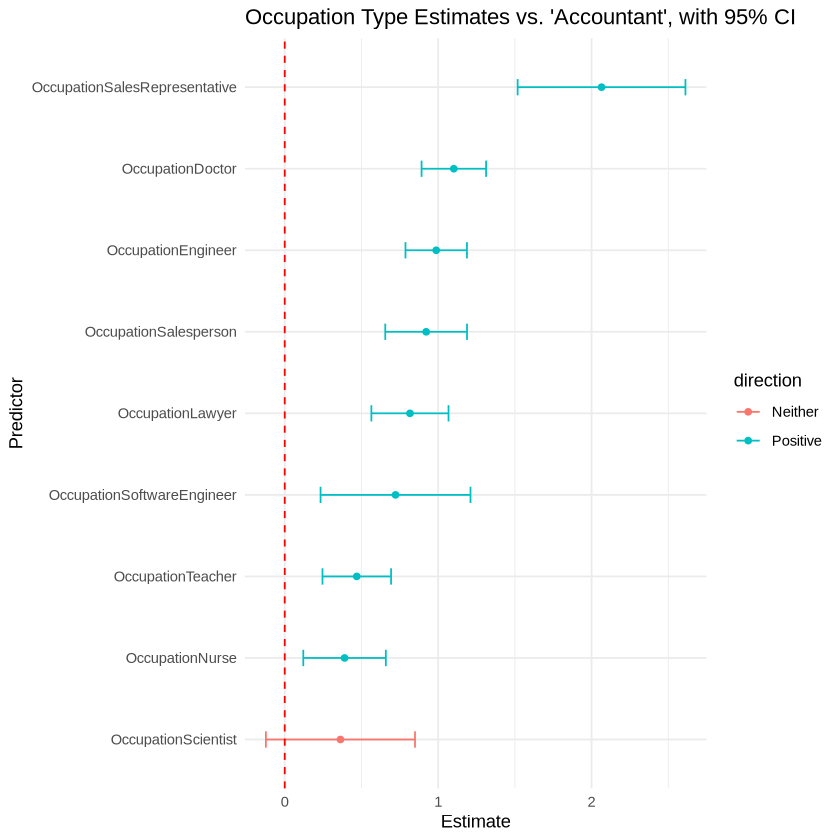

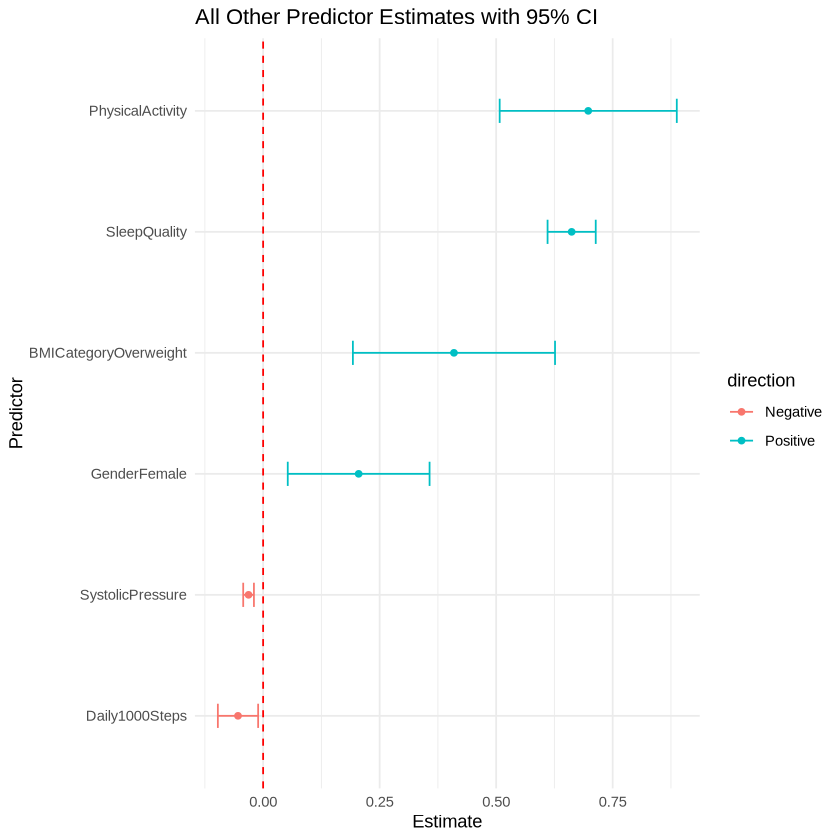

In [11]:
model_results <- tidy(aic_model, conf.int = TRUE) |>
  filter(term != "(Intercept)") |>
  mutate(direction = ifelse(p.value < 0.05,ifelse(estimate>0, "Positive", "Negative"), "Neither"))

occupation_vars <- model_results |> filter(grepl("^Occupation", term))
sleep_disorder_vars <- model_results |> filter(grepl("^SleepDisorder", term))
other_vars <- model_results |>
  filter(!grepl("^Occupation", term) & !grepl("^SleepDisorder", term))

plot_ci <- function(data, title) {
  ggplot(data, aes(x = estimate, y = reorder(term, estimate))) +
    geom_point() +
    geom_errorbarh(aes(xmin = conf.low, xmax = conf.high), height = 0.2) +
    geom_vline(xintercept = 0, linetype = "dashed", color = "red") +
    labs(title = title, x = "Estimate", y = "Predictor")
}

plot_ci(occupation_vars, "Occupation Type Estimates vs. 'Accountant', with 95% CI")

### Interpretation:

These graphs have a clean visualization of the significance of each predictor using mean and CI, as well as showing the direction of association, all corresponding to results we have explained above.

### FURTHER EXPLAIN VISUALIZATION HERE IF NEEDED. ***

# Discussion

### Put discussion part here ***

### extra diagnostics

In [12]:
#plot(aic_model)

# 4. References:

Grandner, M. A. (2017). Sleep, health, and society. Sleep Medicine Clinics, 12(1), 1–22. https://doi.org/10.1016/j.jsmc.2016.10.012

Khan, M. S., & Aouad, R. (2017). The effects of insomnia and sleep loss on cardiovascular disease. Sleep Medicine Clinics, 12(2), 167–177. https://doi.org/10.1016/j.jsmc.2017.01.005

Medic, G., Wille, M., & Hemels, M. E. (2017). Short- and long-term health consequences of sleep disruption. Nature and Science of Sleep, 9, 151–161. https://doi.org/10.2147/NSS.S134864